In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
df=pd.read_csv(r"C:\Users\Dell\Downloads\AutoInsurance.csv")
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


# EDA

In [3]:
#Understand the data
print(df.keys()) # Print name of variables
print("Data Shape:", df.shape) #print no of rows & columns
print(df.head()) #print top 5 observations
print(df.dtypes) #print data type of variables
df.describe() # Descriptive stats about data

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')
Data Shape: (9134, 24)
  Customer       State  Customer Lifetime Value Response  Coverage Education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bach

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [4]:
#Missing Value Detection 
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [5]:
## No  NULL value in variables so no need to  handel null value with mean mode median

In [6]:
df_cat=df.select_dtypes(include=["object"])
df_num=df.select_dtypes(include=["number"])


In [7]:
df_cat

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,3/2/2011,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,10/2/2011,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,12/2/2011,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,6/2/2011,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,3/2/2011,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [8]:
df_cat.columns

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'Effective To Date', 'EmploymentStatus', 'Gender', 'Location Code',
       'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [9]:
df_num

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [10]:
# Categoricle data

In [11]:
df_cat.describe()

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
count,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134
unique,9134,5,2,3,5,59,5,2,3,3,3,9,4,4,6,3
top,BU79786,California,No,Basic,Bachelor,10/1/2011,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize
freq,1,3150,7826,5568,2748,195,5698,4658,5779,5298,6788,3426,3752,3477,4621,6424


In [12]:
df_cat['Customer'].value_counts()

BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: Customer, Length: 9134, dtype: int64

In [13]:
df_cat['Response'].value_counts()

No     7826
Yes    1308
Name: Response, dtype: int64

<Axes: xlabel='Response', ylabel='count'>

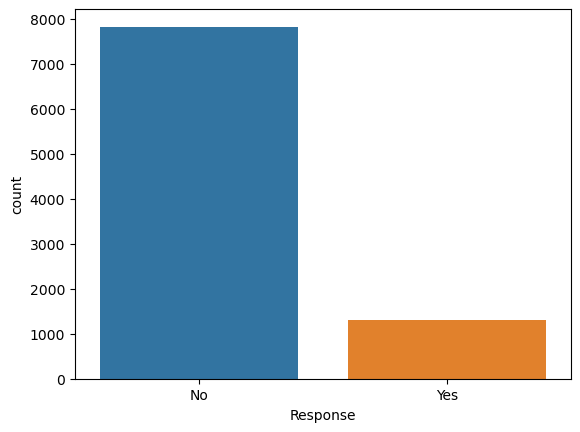

In [14]:
sns.countplot(x='Response',data=df_cat)

In [15]:
for cat_col in df_cat.columns:
    print(df[cat_col].value_counts())
    

BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: Customer, Length: 9134, dtype: int64
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64
No     7826
Yes    1308
Name: Response, dtype: int64
Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64
10/1/2011    195
1/27/11      194
2/14/11      186
1/26/11      181
1/17/11      180
1/19/11      179
1/31/11      178
3/1/2011     178
1/20/11      173
2/26/11      169
1/28/11      169
2/19/11      168
5/1/2011     167
2/27/11      167
11/1/2011    166
4/2/2011     164
10/2/2011    161
2/28/11      161
2/1/2011     160
1/21/11      160
1/29/11      160
2/22/11      158
5/2/2011   

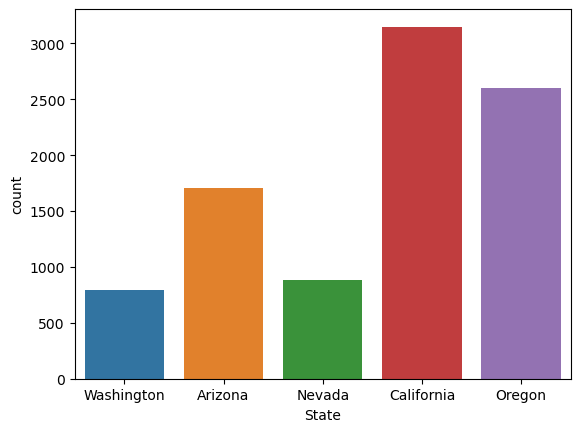

In [16]:
#Distribution of autoinsurance by state

ax=sns.countplot(x='State',data=df_cat)

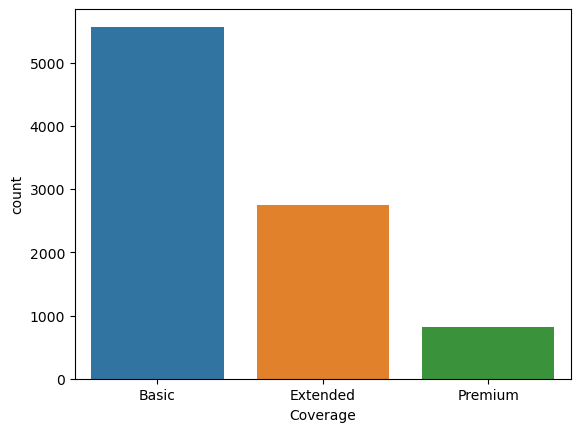

In [17]:
#Distribution of autoinsurance by Coverage

ax=sns.countplot(x='Coverage',data=df_cat)

In [18]:
# for i in df_cat.columns:
#     ax=sns.countplot(x=i,data=df_cat)
    

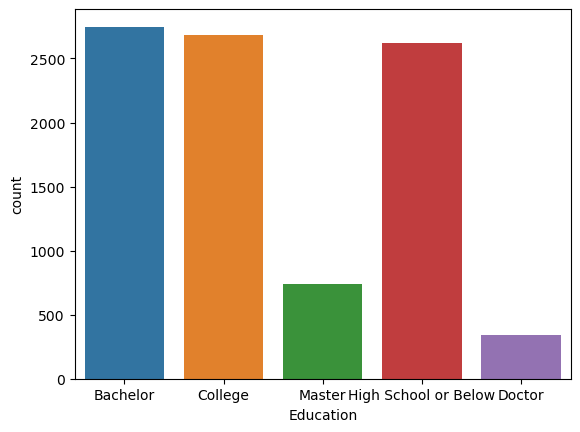

In [19]:
#Distribution of autoinsurance by  education

ax=sns.countplot(x='Education',data=df_cat)

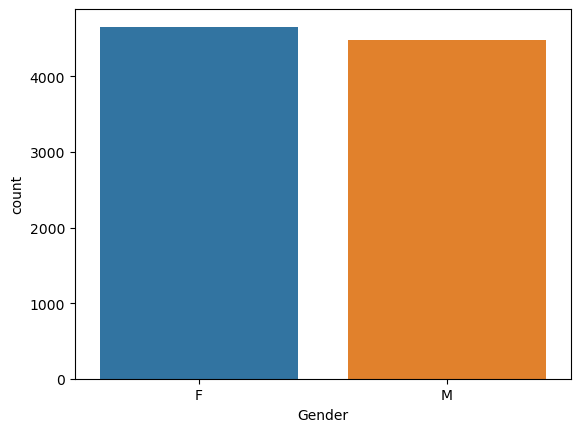

In [20]:
#  Gender

ax=sns.countplot(x='Gender',data=df_cat)

Text(0, 0.5, 'Count of clients')

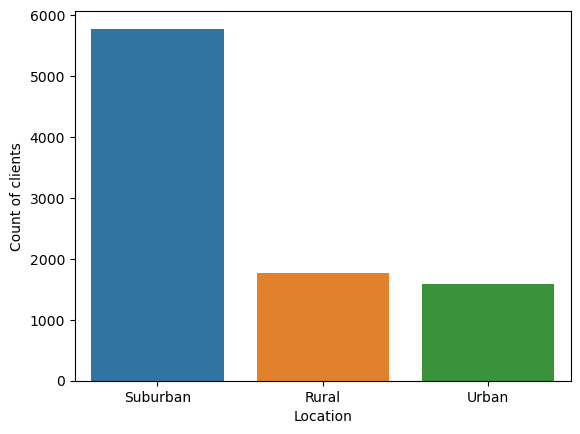

In [21]:
# Location



ax=sns.countplot(x='Location Code',data=df_cat)
plt.xlabel('Location')
plt.ylabel('Count of clients')

Text(0, 0.5, 'Count of clients')

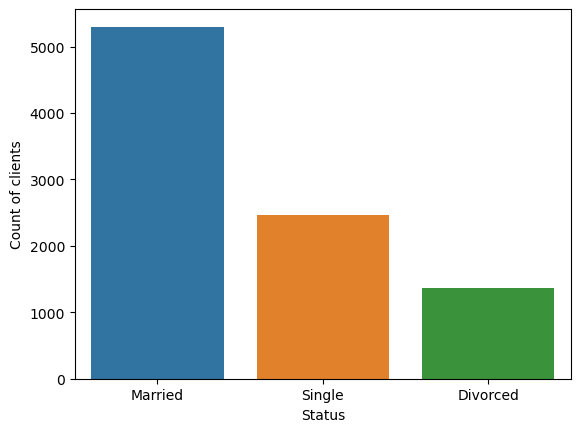

In [22]:

ax=sns.countplot(x='Marital Status',data=df_cat)
plt.xlabel('Status')
plt.ylabel('Count of clients')

Text(0, 0.5, 'Count of clients')

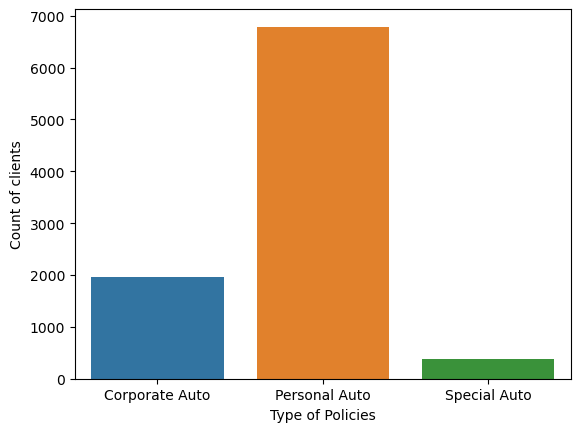

In [23]:
ax=sns.countplot(x='Policy Type',data=df_cat)
plt.xlabel('Type of Policies')
plt.ylabel('Count of clients')

Text(0, 0.5, 'Count of clients')

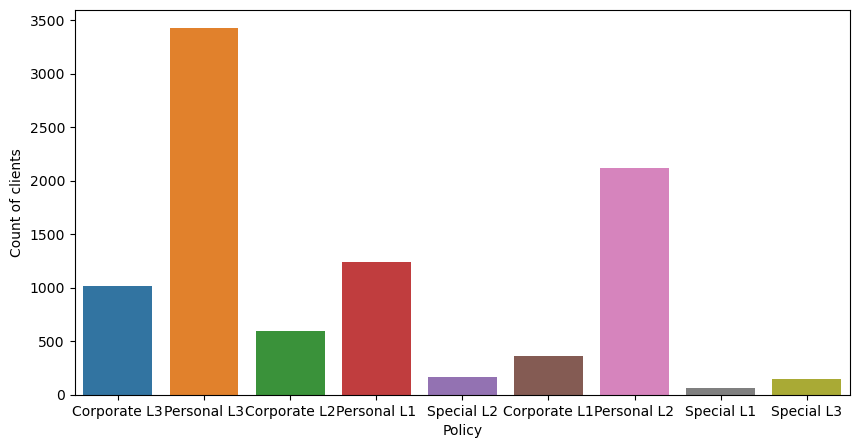

In [24]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x='Policy',data=df_cat)
plt.xlabel('Policy')
plt.ylabel('Count of clients')


Text(0, 0.5, 'Count of clients')

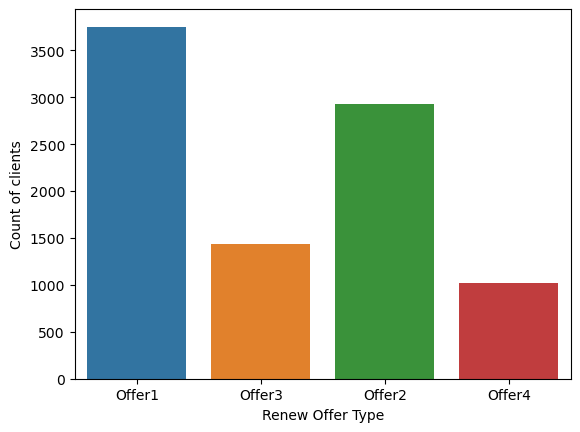

In [25]:
# plt.figure(figsize=(10,5))
ax=sns.countplot(x='Renew Offer Type',data=df_cat)
plt.xlabel('Renew Offer Type')
plt.ylabel('Count of clients')

Text(0, 0.5, 'Count of clients')

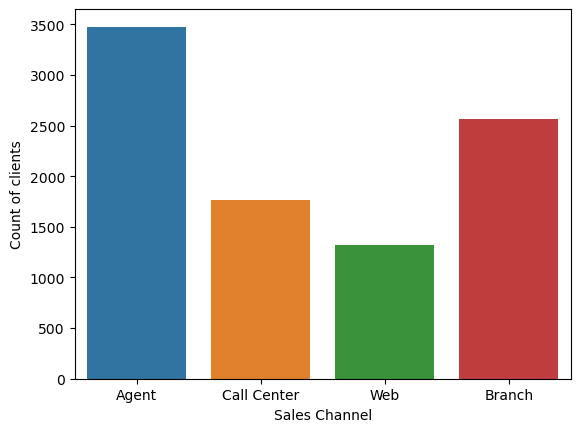

In [26]:
ax=sns.countplot(x='Sales Channel',data=df_cat)
plt.xlabel('Sales Channel')
plt.ylabel('Count of clients')

Text(0, 0.5, 'Count of clients')

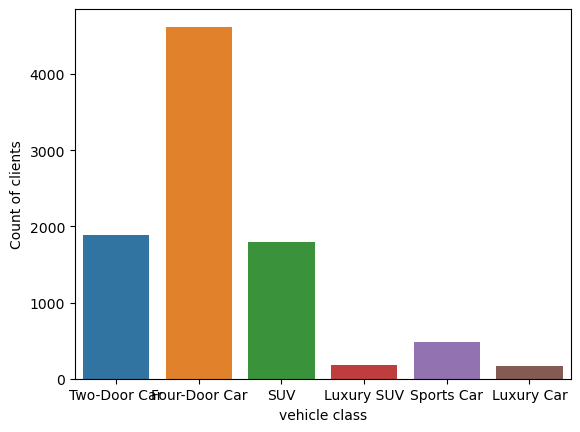

In [27]:
ax=sns.countplot(x='Vehicle Class',data=df_cat)
plt.xlabel('vehicle class')
plt.ylabel('Count of clients')

Text(0, 0.5, 'Count of clients')

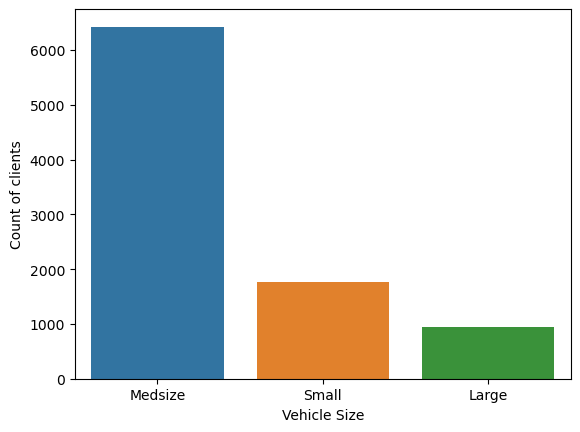

In [28]:
ax=sns.countplot(x='Vehicle Size',data=df_cat)
plt.xlabel('Vehicle Size')
plt.ylabel('Count of clients')

In [29]:
df.select_dtypes(include='number').describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [30]:
(df['Number of Open Complaints']==0).value_counts()

True     7252
False    1882
Name: Number of Open Complaints, dtype: int64

In [31]:
complaints=df['Number of Open Complaints'].reset_index()
complaints.drop(complaints.index[df['Number of Open Complaints']==0],inplace=True)
complaints.describe()

,index,Number of Open Complaints
count,1882.000000,1882.000000
mean,4484.710946,1.865569
std,2629.681169,1.122244
min,12.000000,1.000000
25%,2184.750000,1.000000
50%,4513.500000,1.000000
75%,6734.000000,3.000000
max,9131.000000,5.000000


In [32]:
df.groupby(['Coverage'])[['Income']].mean().sort_values(by='Income',ascending=False)

,Income
Coverage,
Premium,38607.120146
Basic,38145.834770
Extended,36380.099927


In [33]:
df.groupby(['Education'])[['Income']].mean().sort_values(by='Income',ascending=False)

,Income
Education,
Master,44768.187584
Doctor,42353.128655
Bachelor,37426.814774
College,37357.165983
High School or Below,35583.929443


In [34]:
df.groupby(['Coverage'])[['Customer Lifetime Value']].mean().sort_values(by='Customer Lifetime Value',ascending=False)

,Customer Lifetime Value
Coverage,
Premium,10895.603083
Extended,8789.677608
Basic,7190.706422


In [35]:
df.groupby(['Education'])[['Customer Lifetime Value']].mean().sort_values(by='Customer Lifetime Value',ascending=False)

,Customer Lifetime Value
Education,
High School or Below,8296.709033
Master,8243.484692
Bachelor,7872.660412
College,7851.064644
Doctor,7520.344837


In [36]:
df.groupby(['Marital Status'])[['Customer Lifetime Value']].mean().sort_values(by='Customer Lifetime Value',ascending=False)

,Customer Lifetime Value
Marital Status,
Divorced,8241.239135
Married,8078.966969
Single,7714.837018


# Univariate analysis

In [37]:
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

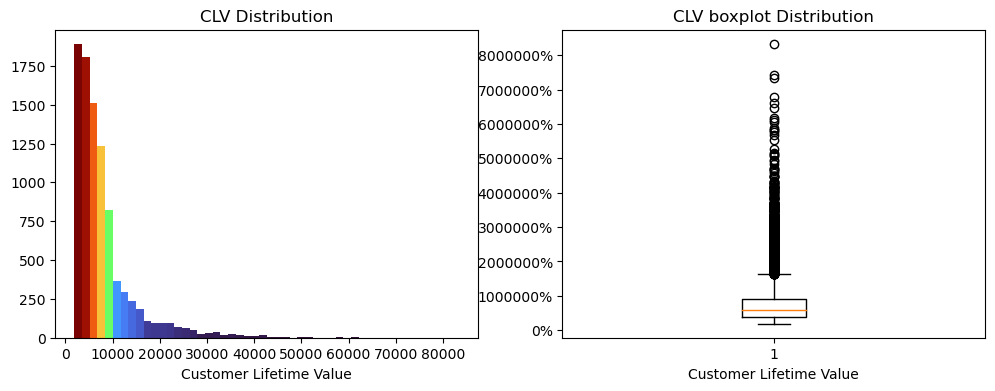

In [38]:
fig,axs=plt.subplots(1,2,figsize=(12,4))
n,bins,patches=axs[0].hist(df['Customer Lifetime Value'],bins=50)
group=n/n.max()
norm=colors.Normalize(group.min(),group.max())
for thisgroup,thispatch in zip(group,patches):
      color=plt.cm.turbo(norm(thisgroup))
      thispatch.set_facecolor(color)
axs[1].boxplot(df['Customer Lifetime Value'])
axs[0].set(xlabel='Customer Lifetime Value',ylabel='',title='CLV Distribution')
axs[1].set(xlabel='Customer Lifetime Value',ylabel='',title='CLV boxplot Distribution')
axs[1].yaxis.set_major_formatter( PercentFormatter(xmax=1))

array([[<Axes: title={'center': 'Customer Lifetime Value'}>]],
      dtype=object)

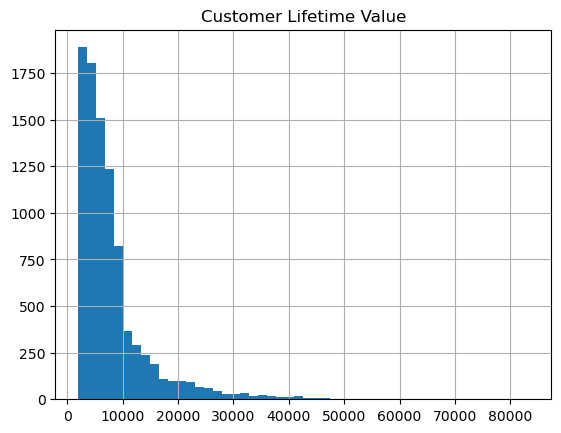

In [39]:
df.hist(['Customer Lifetime Value'],bins=50)

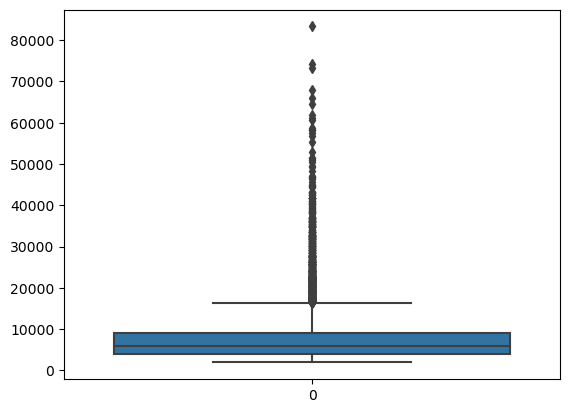

In [40]:
sns.boxplot(df["Customer Lifetime Value"])
plt.show()

In [41]:
df['Customer Lifetime Value'].skew()

3.0322802599299847

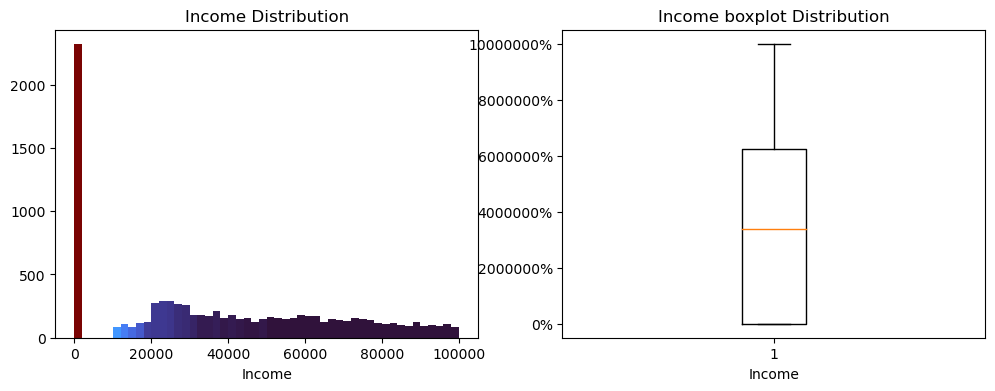

In [42]:
fig,axs=plt.subplots(1,2,figsize=(12,4))

n,bins,patches=axs[0].hist(df['Income'],bins=50)
# group=n/n.max()
norm=colors.Normalize(group.min(),group.max())
for thisgroup,thispatch in zip(group,patches):
      color=plt.cm.turbo(norm(thisgroup))
      thispatch.set_facecolor(color)
axs[1].boxplot(df['Income'])
axs[0].set(xlabel='Income',ylabel='',title='Income Distribution')
axs[1].set(xlabel='Income',ylabel='',title='Income boxplot Distribution')
axs[1].yaxis.set_major_formatter( PercentFormatter(xmax=1))

array([[<Axes: title={'center': 'Income'}>]], dtype=object)

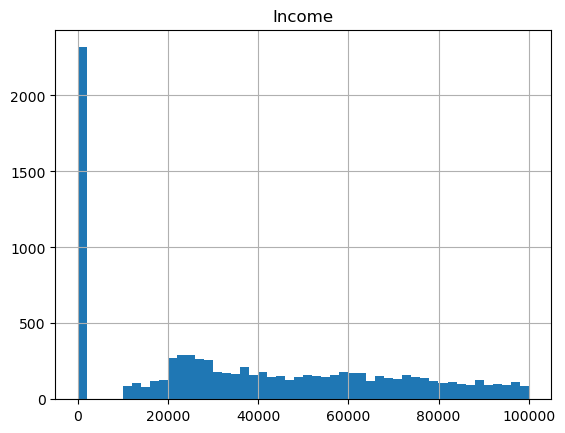

In [43]:
df.hist(['Income'],bins=50)

In [44]:
df['Income'].skew()

0.28688727581189166

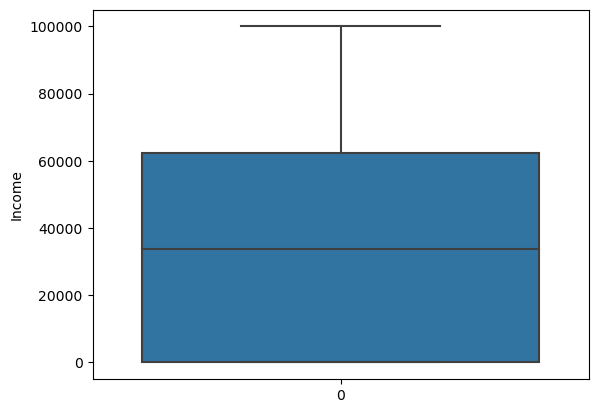

In [45]:
sns.boxplot(df["Income"])
plt.xlabel("")
plt.ylabel("Income")
plt.show()

In [46]:
# monthly preimium auto

array([[<Axes: title={'center': 'Monthly Premium Auto'}>]], dtype=object)

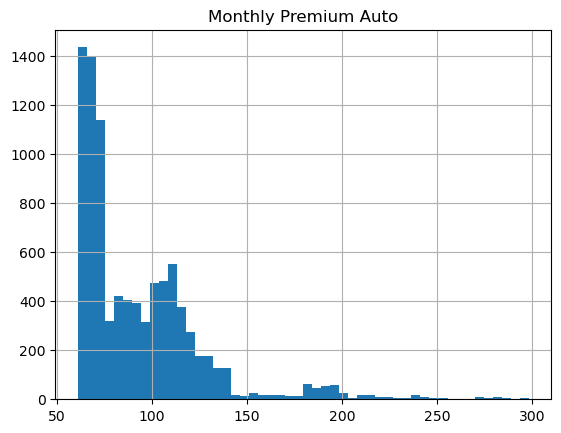

In [47]:
df.hist(['Monthly Premium Auto'],bins=50)

In [48]:
df["Monthly Premium Auto"].skew()

2.1235464499475345

In [49]:
# sns.boxplot(df["Monthly Premium Auto"])

array([[<Axes: title={'center': 'Months Since Last Claim'}>]],
      dtype=object)

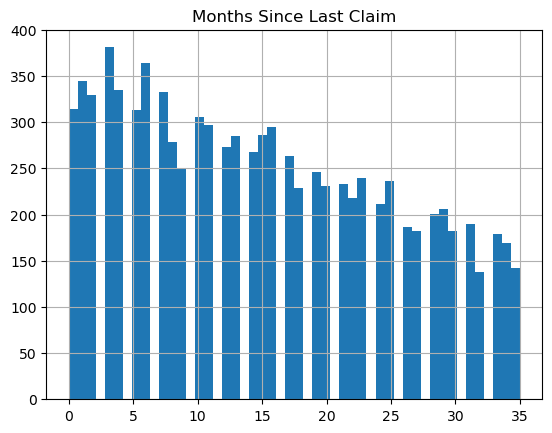

In [50]:
df.hist(['Months Since Last Claim'],bins=50)

In [51]:
df['Months Since Last Claim'].skew()

0.2785863118107981

In [52]:
# sns.boxplot(df['Months Since Last Claim'])

array([[<Axes: title={'center': 'Months Since Policy Inception'}>]],
      dtype=object)

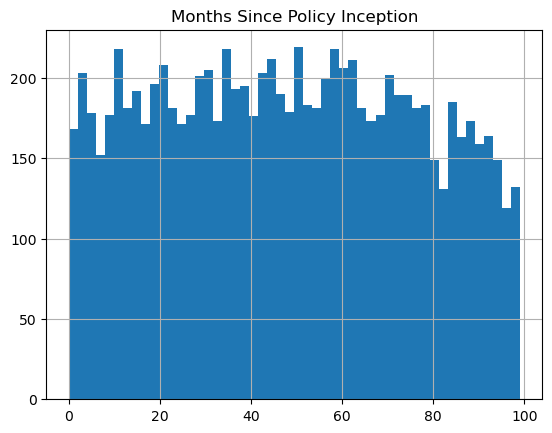

In [53]:
df.hist(['Months Since Policy Inception'],bins=50)

In [54]:
df['Customer Lifetime Value'].skew()

3.0322802599299847

In [55]:
# sns.boxplot(df['Months Since Policy Inception'])

array([[<Axes: title={'center': 'Number of Open Complaints'}>]],
      dtype=object)

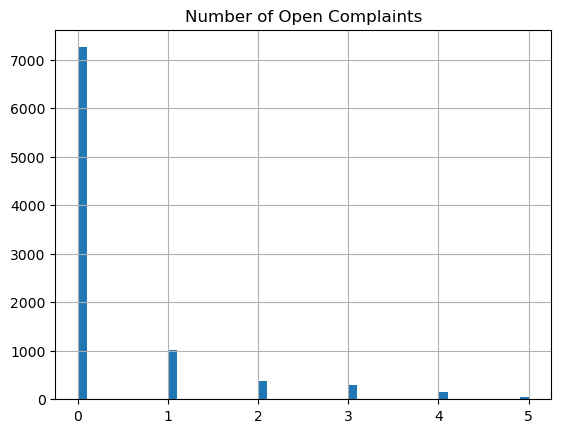

In [56]:
df.hist(['Number of Open Complaints'],bins=50)

In [57]:
df['Number of Open Complaints'].skew()

2.783263052399567

In [58]:
# sns.boxplot(df['Number of Open Complaints'])

array([[<Axes: title={'center': 'Number of Policies'}>]], dtype=object)

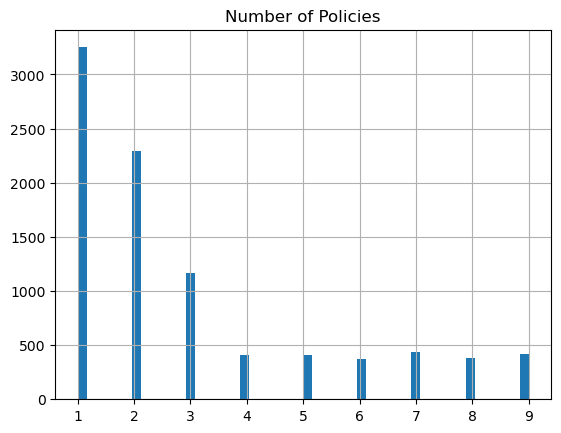

In [59]:
df.hist(['Number of Policies'],bins=50)

In [60]:
df['Number of Policies'].skew()

1.2533327352739663

In [61]:
# sns.boxplot(df['Number of Policies'])

array([[<Axes: title={'center': 'Total Claim Amount'}>]], dtype=object)

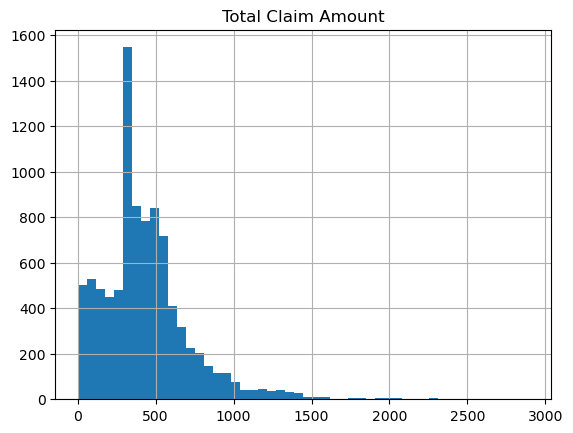

In [62]:
df.hist(['Total Claim Amount'],bins=50)

In [63]:
df['Total Claim Amount'].skew()

1.7149658097209557

In [64]:
# sns.boxplot(df['Total Claim Amount'])

In [65]:
# #Outlier Treatment
# # #IQR
# Q1 = df[['Customer Lifetime Value', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim',
#        'Months Since Policy Inception', 'Number of Open Complaints',
#        'Number of Policies', 'Total Claim Amount']].quantile(0.25)
# Q3 = df[['Customer Lifetime Value', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim',
#        'Months Since Policy Inception', 'Number of Open Complaints',
#        'Number of Policies', 'Total Claim Amount']].quantile(0.75)
# IQR = Q3 - Q1
# print(IQR)

In [66]:
# UL=(Q3 + 1.5 * IQR)
# LL=(Q3 - 1.5 * IQR)


# outlier_col=['Customer Lifetime Value', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim',
#        'Months Since Policy Inception', 'Number of Open Complaints',
#        'Number of Policies', 'Total Claim Amount']
# for i in range(len(outlier_col)):
#     a=df[df[outlier_col[i]]>UL[i]]
#     df.loc[a.index,outlier_col[i]]=UL[i]
    
#     b=df[df[outlier_col[i]]<LL[i]]
#     df.loc[b.index,outlier_col[i]]=LL[i]

In [67]:
# sns.boxplot(df["Customer Lifetime Value"])

In [68]:
# sns.boxplot(df["Income"])

In [69]:
# sns.boxplot(df['Months Since Last Claim'])

In [70]:
# sns.boxplot(df['Months Since Policy Inception'])

In [71]:
# sns.boxplot(df['Number of Open Complaints'])

In [72]:
# sns.boxplot(df['Number of Policies'])

In [73]:
# sns.boxplot(df['Total Claim Amount'])

# Bivariate analysis

<Axes: xlabel='Income', ylabel='Customer Lifetime Value'>

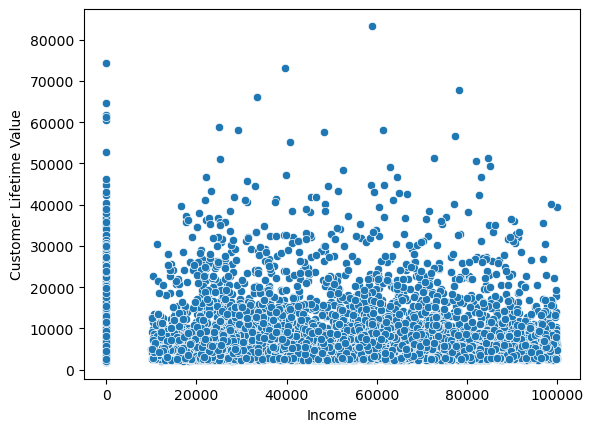

In [74]:

sns.scatterplot(x="Income",y="Customer Lifetime Value",data=df)



<Axes: xlabel='Monthly Premium Auto', ylabel='Customer Lifetime Value'>

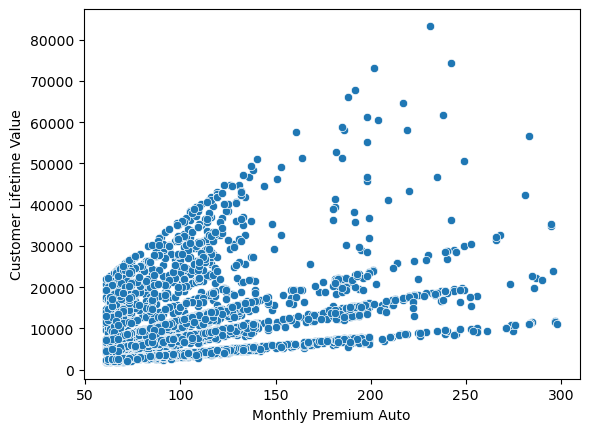

In [75]:
sns.scatterplot(x="Monthly Premium Auto",y="Customer Lifetime Value",data=df)

<Axes: xlabel='Months Since Last Claim', ylabel='Customer Lifetime Value'>

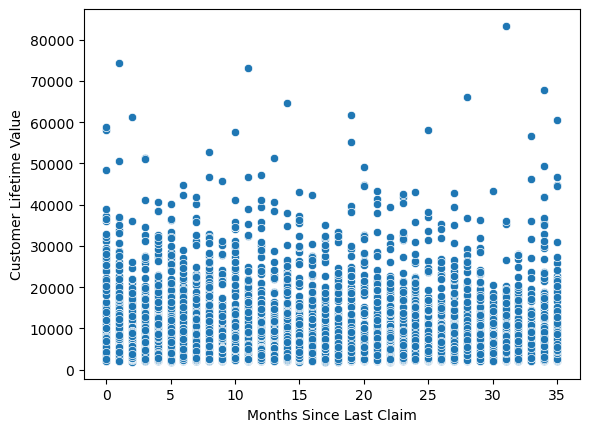

In [76]:

sns.scatterplot(x="Months Since Last Claim",y="Customer Lifetime Value",data=df)



<Axes: xlabel='Months Since Policy Inception', ylabel='Customer Lifetime Value'>

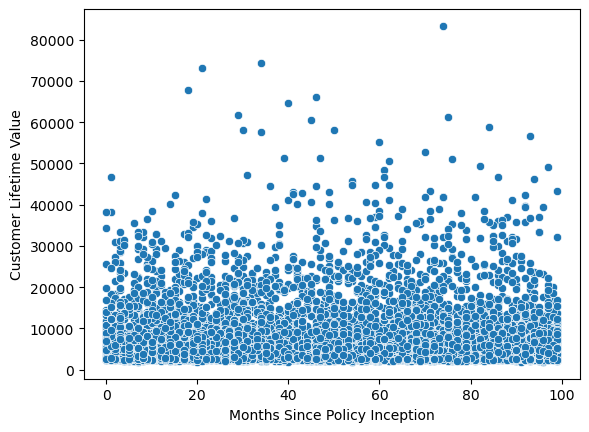

In [77]:
sns.scatterplot(x="Months Since Policy Inception",y="Customer Lifetime Value",data=df)

<Axes: xlabel='Total Claim Amount', ylabel='Customer Lifetime Value'>

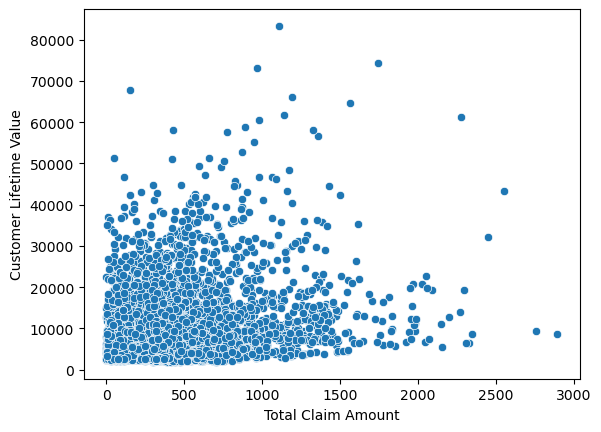

In [78]:
sns.scatterplot(x="Total Claim Amount",y="Customer Lifetime Value",data=df)

<Axes: xlabel='Number of Open Complaints', ylabel='Customer Lifetime Value'>

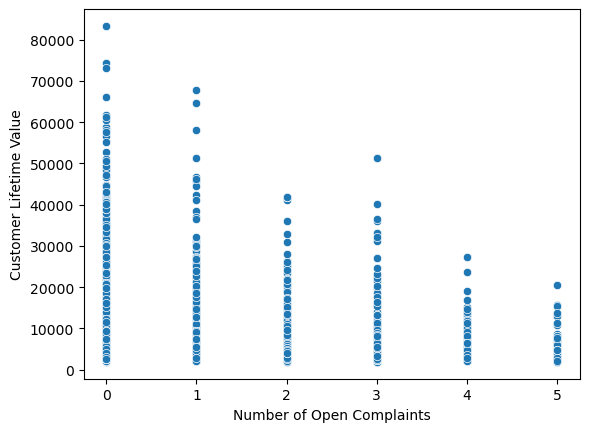

In [79]:
sns.scatterplot(x="Number of Open Complaints",y="Customer Lifetime Value",data=df)

<Axes: xlabel='Number of Policies', ylabel='Customer Lifetime Value'>

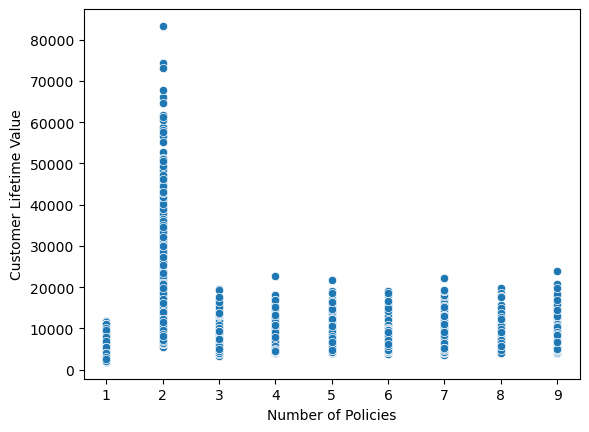

In [80]:
sns.scatterplot(x='Number of Policies',y='Customer Lifetime Value',data=df)

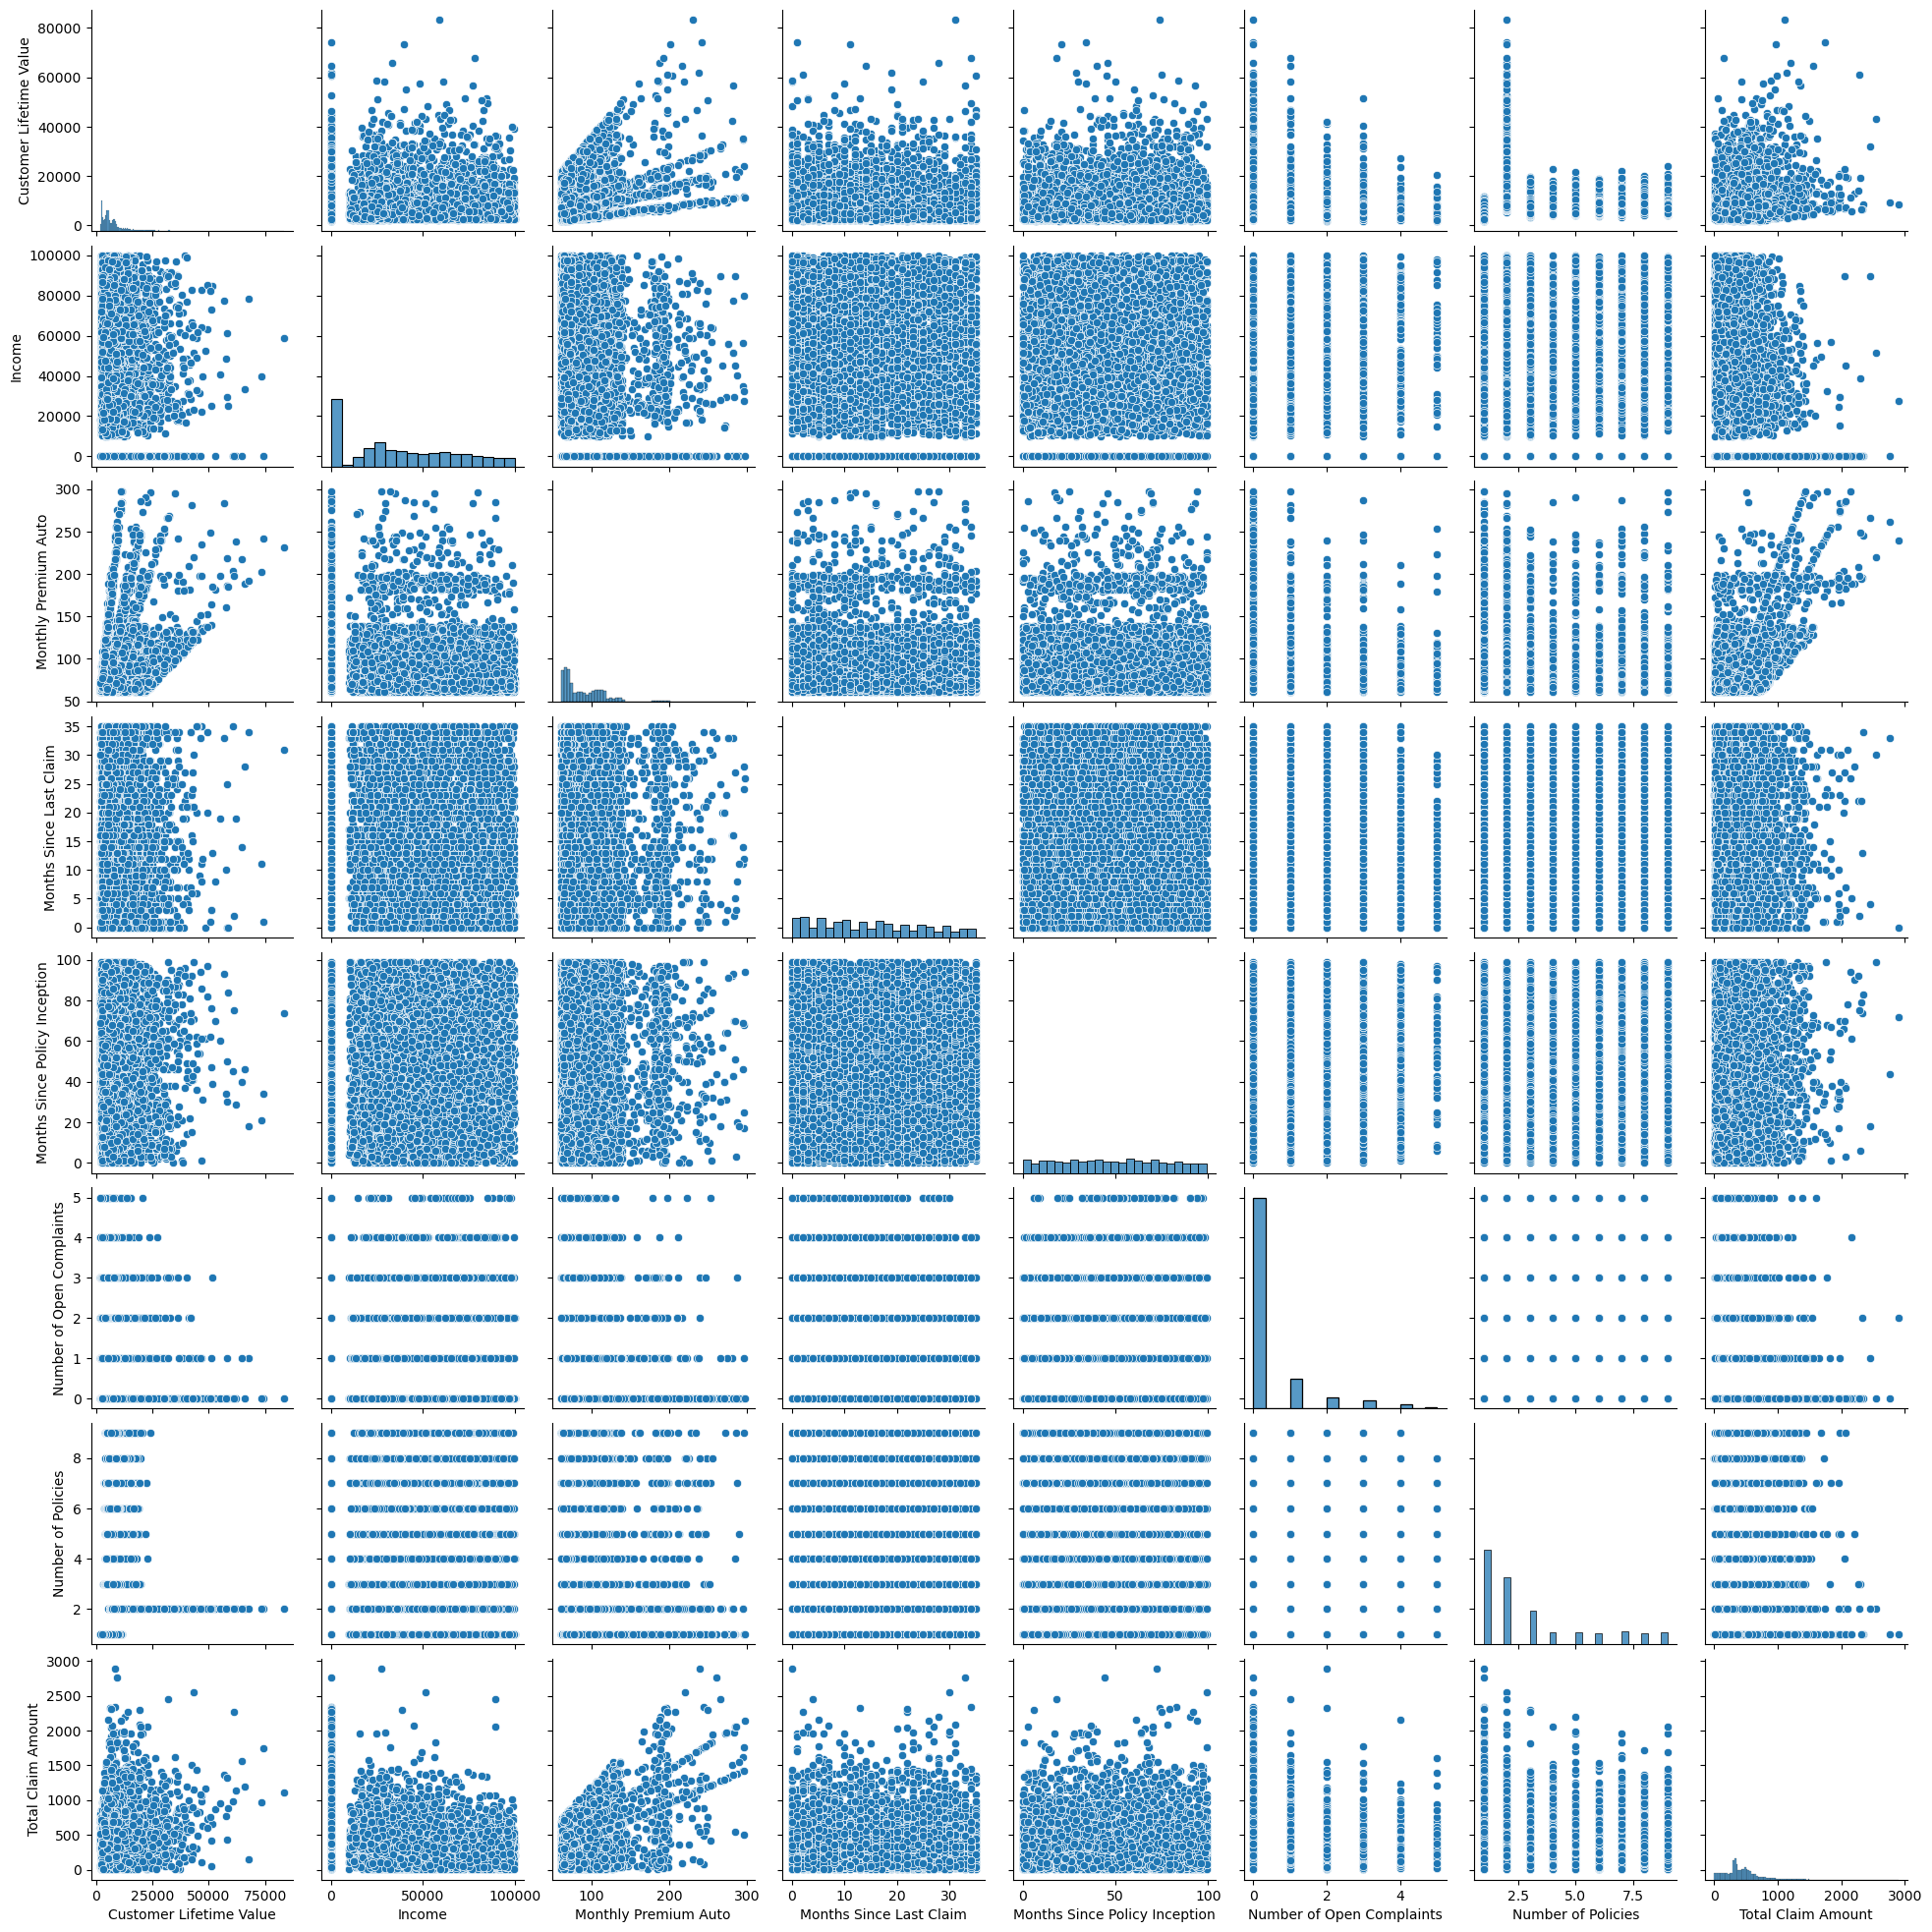

In [81]:
sns.pairplot(df_num)

In [82]:
df['Trasaction Date']=pd.to_datetime(df['Effective To Date'],infer_datetime_format=True)

In [83]:
df["months"]=df["Trasaction Date"].dt.month
df["months"]=df["months"].astype('object')

<Axes: xlabel='months', ylabel='count'>

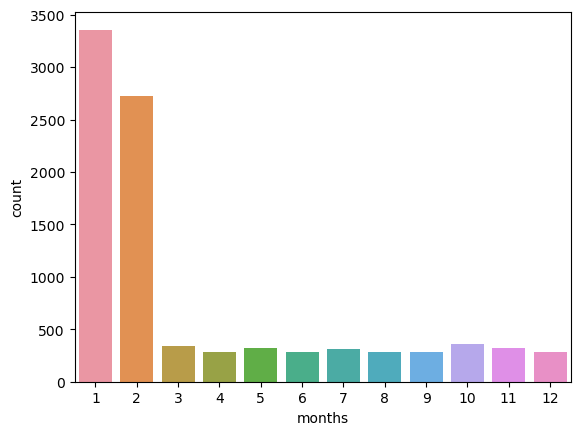

In [84]:
sns.countplot(x=df['months'],data=df)

In [85]:
# Correlation Map

In [86]:
correlation=df_num.corr()

In [87]:
correlation

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


<Axes: >

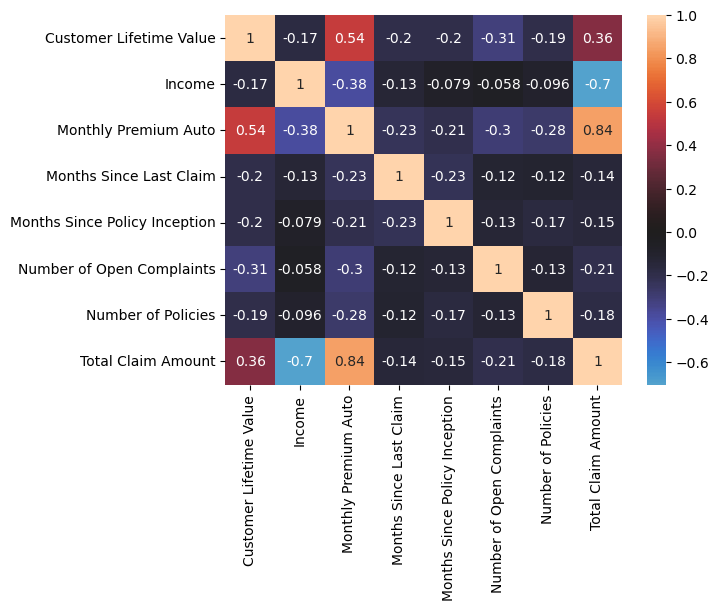

In [88]:
sns.heatmap(correlation.corr(),center=0,annot=True)

In [89]:
heatmap = df[['Customer Lifetime Value', 'Income', 'Monthly Premium Auto','Total Claim Amount']]

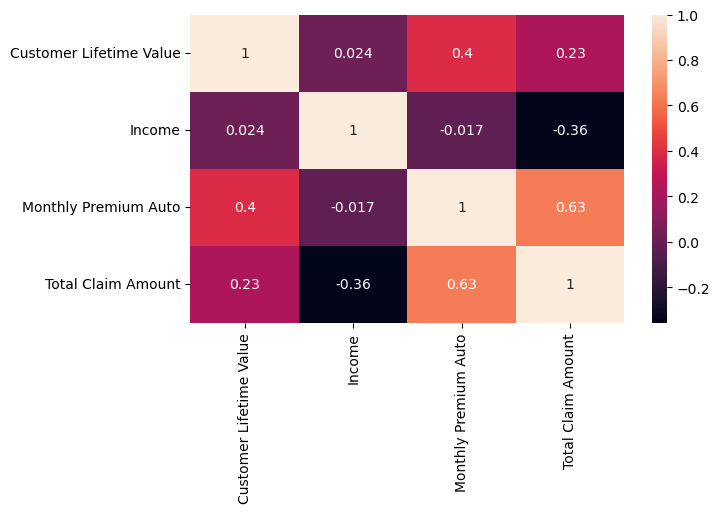

In [90]:
plt.figure(figsize=(7,4))
sns.heatmap(heatmap.corr(),annot=True)
# plt.savefig("Heatmap.png")
plt.show()

In [91]:
# Satatisticle significance

In [92]:
stats.shapiro(df['Customer Lifetime Value'])

C:\Users\Dell\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.7033725380897522, pvalue=0.0)

In [93]:
# p-value less than 0.05 we reject null hypothesis the data is not normally distributed

In [94]:
columns_cat = list(df_cat.columns)
columns_cat

['Customer',
 'State',
 'Response',
 'Coverage',
 'Education',
 'Effective To Date',
 'EmploymentStatus',
 'Gender',
 'Location Code',
 'Marital Status',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size']

In [95]:
df_num.columns

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount'],
      dtype='object')

# Categoricle data encoding

In [97]:
df_cat.columns

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'Effective To Date', 'EmploymentStatus', 'Gender', 'Location Code',
       'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [98]:
df_cat.drop(['Customer'],axis=1,inplace=True)

In [99]:
from sklearn.preprocessing import LabelEncoder

In [100]:
for col in df_cat:
    le=LabelEncoder()
    le.fit(df_cat[col])
    df_cat[col]=le.transform(df_cat[col])
df_cat    

,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,4,0,0,0,40,1,0,1,1,0,2,0,0,5,1
1,0,0,1,0,20,4,0,1,2,1,5,2,0,0,1
2,2,0,2,0,34,1,0,1,1,1,5,0,0,5,1
3,1,0,0,0,9,4,1,1,1,0,1,0,2,3,1
4,4,0,0,0,46,1,1,0,2,1,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,1,0,0,0,22,1,1,2,1,1,3,1,3,0,1
9130,1,1,1,1,26,1,0,1,0,0,2,0,1,0,1
9131,1,0,1,0,52,4,1,1,2,0,1,0,1,0,1
9132,1,0,1,1,46,1,1,1,1,1,4,2,1,0,0


In [101]:
df_final=pd.concat([df_num,df_cat],axis=1)
df_final

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,State,Response,...,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,2763.519279,56274,69,32,5,0,1,384.811147,4,0,...,1,0,1,1,0,2,0,0,5,1
1,6979.535903,0,94,13,42,0,8,1131.464935,0,0,...,4,0,1,2,1,5,2,0,0,1
2,12887.431650,48767,108,18,38,0,2,566.472247,2,0,...,1,0,1,1,1,5,0,0,5,1
3,7645.861827,0,106,18,65,0,7,529.881344,1,0,...,4,1,1,1,0,1,0,2,3,1
4,2813.692575,43836,73,12,44,0,1,138.130879,4,0,...,1,1,0,2,1,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764,1,0,...,1,1,2,1,1,3,1,3,0,1
9130,3096.511217,21604,79,14,28,0,1,379.200000,1,1,...,1,0,1,0,0,2,0,1,0,1
9131,8163.890428,0,85,9,37,3,2,790.784983,1,0,...,4,1,1,2,0,1,0,1,0,1
9132,7524.442436,21941,96,34,3,0,3,691.200000,1,0,...,1,1,1,1,1,4,2,1,0,0


# OLS

In [103]:
import statsmodels.api as sm

In [104]:
y=df_final['Customer Lifetime Value']
x=df_final.drop(['Customer Lifetime Value'],axis=1)

x_constant=sm.add_constant(x)
LR=sm.OLS(y,x_constant).fit()
LR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Customer Lifetime Value   R-squared:                       0.166
Model:                                 OLS   Adj. R-squared:                  0.164
Method:                      Least Squares   F-statistic:                     82.19
Date:                     Sun, 29 Oct 2023   Prob (F-statistic):               0.00
Time:                             08:58:13   Log-Likelihood:                -92833.
No. Observations:                     9134   AIC:                         1.857e+05
Df Residuals:                         9111   BIC:                         1.859e+05
Df Model:                               22                                         
Covariance Type:                 nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           804.6304    487.794      1.650      0.099    -151.555    1760.816
Income                            0.0022      0.003      0.675      0.500      -0.004       0.009
Monthly Premium Auto             82.7090      2.924     28.287      0.000      76.978      88.441
Months Since Last Claim           6.7553      6.545      1.032      0.302      -6.074      19.585
Months Since Policy Inception    -0.7343      2.373     -0.309      0.757      -5.386       3.917
Number of Open Complaints      -251.3338     72.358     -3.473      0.001    -393.171    -109.496
Number of Policies               63.2272     27.656      2.286      0.022       9.014     117.440
Total Claim Amount               -0.5857      0.362     -1.618      0.106      -1.295       0.124
State                            27.6883     51.106      0.542      0.588     -72.492     127.868
Response                       -470.3160    192.596     -2.442      0.015    -847.847     -92.785
Coverage                       -183.0623    113.675     -1.610      0.107    -405.890      39.766
Education                        92.6390     47.779      1.939      0.053      -1.019     186.297
Effective To Date                -8.9942      3.893     -2.311      0.021     -16.625      -1.364
EmploymentStatus               -106.0198     73.587     -1.441      0.150    -250.266      38.227
Gender                         -146.8530    132.608     -1.107      0.268    -406.795     113.089
Location Code                   104.1751    116.551      0.894      0.371    -124.291     332.641
Marital Status                 -240.9880    110.645     -2.178      0.029    -457.877     -24.099
Policy Type                     447.1642    290.991      1.537      0.124    -123.243    1017.571
Policy                          -48.8025     86.244     -0.566      0.572    -217.861     120.256
Renew Offer Type               -347.6454     68.478     -5.077      0.000    -481.878    -213.413
Sales Channel                    20.7426     62.292      0.333      0.739    -101.363     142.848
Vehicle Class                    44.8662     32.421      1.384      0.166     -18.687     108.420
Vehicle Size                    186.7586    123.343      1.514      0.130     -55.021     428.538
==============================================================================
Omnibus:                     5662.741   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            64583.886
Skew:                           2.850   Prob(JB):                         0.00
Kurtosis:                      14.714   Cond. No.                     3.64e+05
==============================================================================

Notes

# Check Multicolinearity

In [106]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(x_constant.values, i) for i in range(x_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=x.columns)

,vif
Income,2.262299
Monthly Premium Auto,2.340985
Months Since Last Claim,1.005299
Months Since Policy Inception,1.014105
Number of Open Complaints,1.003625
Number of Policies,1.010664
Total Claim Amount,2.556702
State,1.001799
Response,1.052735
Coverage,1.285423


In [107]:
# Spliting the data


from sklearn.model_selection import train_test_split
X=df_final.drop(['Customer Lifetime Value','Policy Type','Policy'],axis=1)
y=df_final['Customer Lifetime Value']          
y =np.log(y)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [108]:
print(X_train)

      Income  Monthly Premium Auto  Months Since Last Claim  \
434    48567                   130                       12   
4641   26877                   131                        5   
4952   12902                   139                        3   
1489       0                   121                        5   
812    70247                    83                       13   
...      ...                   ...                      ...   
5734   87957                    61                       31   
5191   22520                    73                       17   
5390       0                   129                       13   
860        0                   139                        5   
7270   78092                    84                       34   

      Months Since Policy Inception  Number of Open Complaints  \
434                              15                          0   
4641                              2                          0   
4952                             51          

In [109]:
print(X_test)

      Income  Monthly Premium Auto  Months Since Last Claim  \
708    74585                   106                        1   
47     23218                    71                        7   
3995   94903                    94                        3   
1513   77153                    99                        3   
3686   23769                    69                       18   
...      ...                   ...                      ...   
4271   86096                   108                       30   
7923       0                   122                       15   
5633   85609                   136                       22   
8432       0                    71                       12   
681    35296                   126                       19   

      Months Since Policy Inception  Number of Open Complaints  \
708                              49                          0   
47                               10                          0   
3995                             38          

In [110]:
print(y_train)

434     8.520191
4641    8.546616
4952    8.497989
1489    9.049059
812     8.095151
          ...   
5734    8.900321
5191    8.612311
5390    9.104177
860     9.591202
7270    8.116608
Name: Customer Lifetime Value, Length: 6393, dtype: float64


In [111]:
print(y_test)

708      8.348214
47       8.615108
3995     8.244891
1513     8.976493
3686     8.978625
          ...    
4271     8.374558
7923     9.108442
5633     8.616590
8432     8.535716
681     10.281731
Name: Customer Lifetime Value, Length: 2741, dtype: float64


# MOdel Creation

# Linear Regression

In [113]:
from sklearn.linear_model import LinearRegression

In [114]:
lr = LinearRegression()
model = lr.fit(X_train,y_train)
print(f'R^2 score for train: {lr.score(X_train, y_train)}')
print(f'R^2 score for test: {lr.score(X_test, y_test)}')

R^2 score for train: 0.24993288652148127
R^2 score for test: 0.2455957715972653


In [115]:
y_pred = model.predict(X_test)

In [116]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [117]:
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred)) 

RMSE: 0.580801482414446
MAE 0.44928981546785346
R-squared: 0.2455957715972653


In [118]:
X_constant_new=sm.add_constant(x)
lin_reg=sm.OLS(y,X_constant_new).fit()
lin_reg.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Customer Lifetime Value   R-squared:                       0.250
Model:                                 OLS   Adj. R-squared:                  0.249
Method:                      Least Squares   F-statistic:                     138.3
Date:                     Sun, 29 Oct 2023   Prob (F-statistic):               0.00
Time:                             08:58:15   Log-Likelihood:                -7750.3
No. Observations:                     9134   AIC:                         1.555e+04
Df Residuals:                         9111   BIC:                         1.571e+04
Df Model:                               22                                         
Covariance Type:                 nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             7.8741      0.044    179.219      0.000       7.788       7.960
Income                         5.323e-07   2.93e-07      1.815      0.069   -4.25e-08    1.11e-06
Monthly Premium Auto              0.0084      0.000     31.953      0.000       0.008       0.009
Months Since Last Claim           0.0004      0.001      0.594      0.552      -0.001       0.002
Months Since Policy Inception    -0.0003      0.000     -1.250      0.211      -0.001       0.000
Number of Open Complaints        -0.0302      0.007     -4.632      0.000      -0.043      -0.017
Number of Policies                0.0535      0.002     21.478      0.000       0.049       0.058
Total Claim Amount            -7.419e-05   3.26e-05     -2.276      0.023      -0.000   -1.03e-05
State                            -0.0002      0.005     -0.050      0.960      -0.009       0.009
Response                         -0.0410      0.017     -2.364      0.018      -0.075      -0.007
Coverage                          0.0291      0.010      2.839      0.005       0.009       0.049
Education                         0.0092      0.004      2.129      0.033       0.001       0.018
Effective To Date                -0.0007      0.000     -2.106      0.035      -0.001   -5.13e-05
EmploymentStatus                 -0.0120      0.007     -1.814      0.070      -0.025       0.001
Gender                           -0.0119      0.012     -0.999      0.318      -0.035       0.011
Location Code                     0.0112      0.010      1.071      0.284      -0.009       0.032
Marital Status                   -0.0276      0.010     -2.769      0.006      -0.047      -0.008
Policy Type                       0.0468      0.026      1.786      0.074      -0.005       0.098
Policy                           -0.0062      0.008     -0.803      0.422      -0.021       0.009
Renew Offer Type                 -0.0418      0.006     -6.769      0.000      -0.054      -0.030
Sales Channel                    -0.0040      0.006     -0.706      0.480      -0.015       0.007
Vehicle Class                     0.0102      0.003      3.499      0.000       0.004       0.016
Vehicle Size                      0.0184      0.011      1.655      0.098      -0.003       0.040
==============================================================================
Omnibus:                     1446.045   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2227.924
Skew:                           1.148   Prob(JB):                         0.00
Kurtosis:                       3.765   Cond. No.                     3.64e+05
==============================================================================

Notes

# Decision tre

In [120]:
from sklearn.tree import DecisionTreeRegressor

In [121]:
dt = DecisionTreeRegressor(random_state=1)

dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred))

RMSE: 0.25428787097273026
MAE 0.10057072025897944
R-squared: 0.855389451635884


In [122]:
print(f'R^2 score for trian: {dt.score(X_train, y_train)}')
print(f'R^2 score for test: {dt.score(X_test, y_test)}')




R^2 score for trian: 1.0
R^2 score for test: 0.855389451635884


# Randome Forest

In [124]:
from sklearn.ensemble import RandomForestRegressor

In [125]:
rf = RandomForestRegressor(random_state=1)

rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred)) 

RMSE: 0.19668328433780627
MAE 0.08934592424090715
R-squared: 0.9134865591744283


In [126]:
print(f'R^2 score for trian: {rf.score(X_train, y_train)}')
print(f'R^2 score for test: {rf.score(X_test, y_test)}')

R^2 score for trian: 0.9869523709318689
R^2 score for test: 0.9134865591744283



# HyperParameter tuning

In [128]:
from sklearn.model_selection import GridSearchCV

In [129]:

rf = RandomForestRegressor()
params = {
        'max_depth' : [10,20,30],
        
        'n_estimators' : [100,200,50],
        
        "bootstrap" : [True, False],
    
        'max_features': ['auto', 'sqrt', 'log2']
        
        }

grid = GridSearchCV(estimator = rf, param_grid=params, cv = 5, n_jobs = -1, return_train_score = True )
grid.fit(X,y)
grid.best_params_

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'auto',
 'n_estimators': 100}

In [130]:
rf = RandomForestRegressor(**grid.best_params_)

rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred))

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RMSE: 0.19711812699115996
MAE 0.08941195799042836
R-squared: 0.9131035950542331


# Adaboost Regressor

In [132]:
from sklearn.ensemble import AdaBoostRegressor

In [133]:
adaboost = AdaBoostRegressor(
    RandomForestRegressor(max_depth=5,criterion='squared_error'),
    n_estimators=150
)
adaboost.fit(X_train,y_train)

AdaBoostRegressor(estimator=RandomForestRegressor(max_depth=5),
                  n_estimators=150)

In [134]:
y_pred = adaboost.predict(X_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred))

RMSE: 0.21663205880900097
MAE 0.12988999814253477
R-squared: 0.8950471742822258


In [137]:
important_feature=rf.feature_importances_
list_feature=X_train.columns
df_feature_importance=pd.DataFrame(important_feature,index=list_feature,columns=["Importance"]).sort_values("Importance",ascending=False)
df_feature_importance

,Importance
Number of Policies,0.673130
Monthly Premium Auto,0.230512
Total Claim Amount,0.013674
Months Since Policy Inception,0.011579
Income,0.011541
Effective To Date,0.011281
Months Since Last Claim,0.011146
EmploymentStatus,0.004539
Education,0.004046
Coverage,0.003826


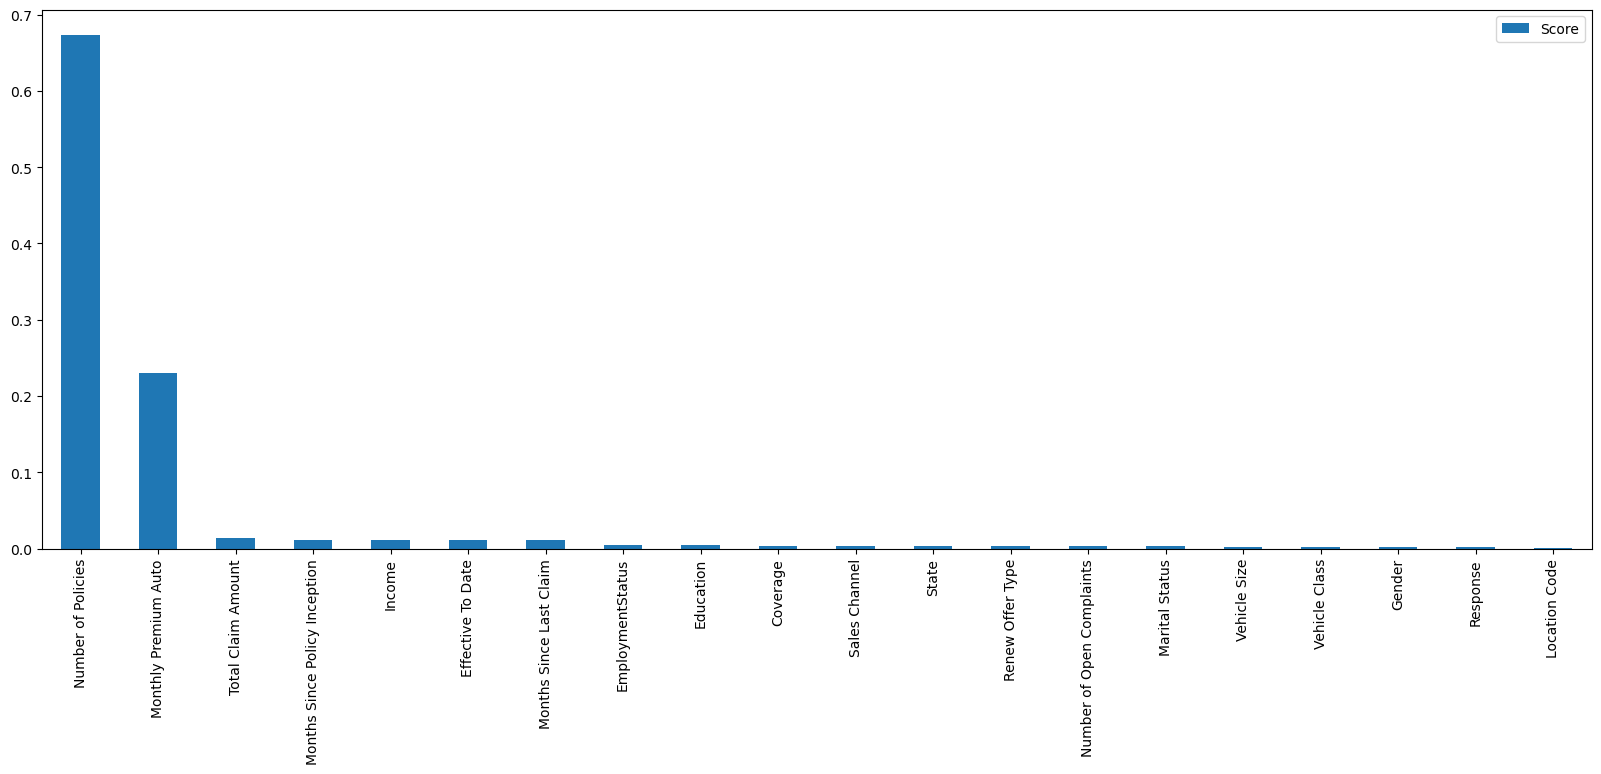

In [136]:
pd.DataFrame(rf.feature_importances_,index=X.columns,columns=['Score']).sort_values("Score",ascending=False).plot(kind='bar',figsize=(20,7))
plt.show()